In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Polygon

In [3]:
dat_folder = 'data/logs/standalone/'
files = ['cloud_1_run.log', 'edge_1_run.log', 
         'cloud_20.log','cloud_40.log','cloud_60.log','cloud_80.log','cloud_100.log','cloud_120.log','cloud_140.log',
         'edge_20.log','edge_40.log','edge_60.log','edge_80.log','edge_100.log','edge_120.log','edge_140.log',
        'mobility.log', 'mobility_line.log']
header = ['time', 'latency', 'size']
column_names = ["Time","Latency (ms)","Size (MB)"]
data = {}
dfs_dict = {}

for file in files:
    time = 0
    run = []
    i = 0
    data[file[:-4]] = []
    with open(dat_folder + file, "r") as to_read:
        for l in to_read.readlines():
            if 'Time' in l: pass
            elif '------' in l:
                data[file[:-4]].append(run)
                i = i + 1
                run = []
                time = 0
            else:
                x = l[:-2].split("(")[-1].split(",")
                lat, by = float(x[0]), float(x[1]) / 10**6
                run.append((time,lat,by))
                time = time + 1
                
for scenario in map(lambda s: s[:-4], files):
    dfs_list = []
    for run in data[scenario]:
        dfs_list.append(pd.DataFrame(run, columns=column_names))
    dfs_dict[scenario] = dfs_list
print(len(dfs_dict['mobility']))

36


# Single Run

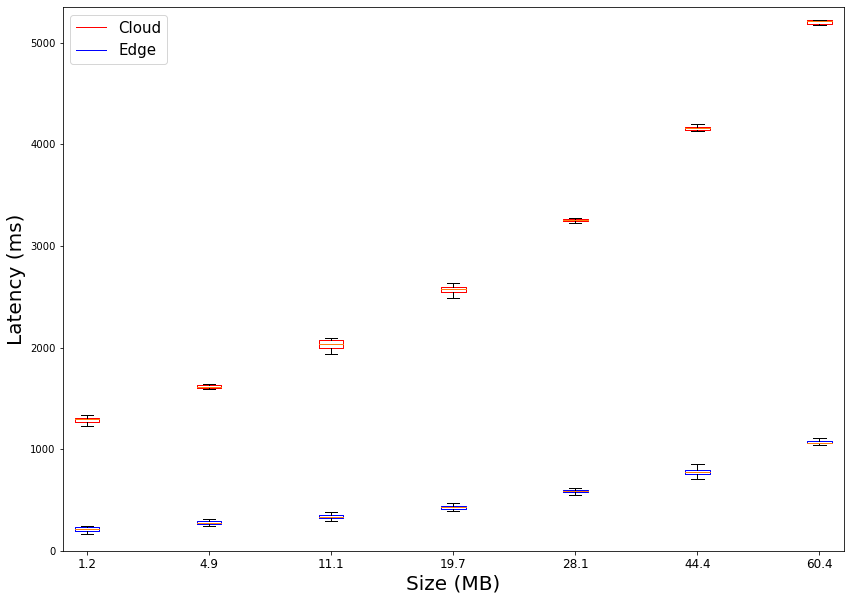

In [58]:
fig = plt.figure(figsize=[14,10])
ax = plt.subplot(111)
ax.grid(False)
ax_background.grid(False)

x = dfs_dict['edge_1_run'][0].reset_index()['Size (MB)']


boxes = []

for s in ['cloud_1_run','edge_1_run']:
    all_data = []
    for df in dfs_dict[s]:
        data = []
        i = 0
        for l in df['Latency (ms)']:
            i = i + 1
            data.append(l)
            if i % 10 == 0:
                all_data.append(data)
                data = []
    boxes.append(all_data)
b1 = ax.boxplot(boxes[0],0,'',positions=range(0,7), widths = 0.2)
b2 = ax.boxplot(boxes[1],0,'',positions=range(0,7), widths = 0.2)
for b in b1['boxes']: b.set(color='red')
for b in b2['boxes']: b.set(color='blue')
ax.set_xticks(range(0,7))
ax.set_xticklabels([round(x[0],1), round(x[10],1), round(x[20],1), round(x[30],1), round(x[40],1), round(x[50],1), round(x[60],1)], fontsize='12')
ax.set_xlabel('Size (MB)')
ax.set_ylabel('Latency (ms)')
ax.set_xlim(-0.2, 6.2)
ax.set_ylim(0, 5350)
ax.legend([b1["boxes"][0], b2["boxes"][0]], ['Cloud', 'Edge'], fontsize='15')
ax.xaxis.get_label().set_size(20)
ax.yaxis.get_label().set_size(20)
plt.show()

In [59]:
fig.savefig(f'images/single_run_fixed_size.pdf', dpi=100)

# Independent Run

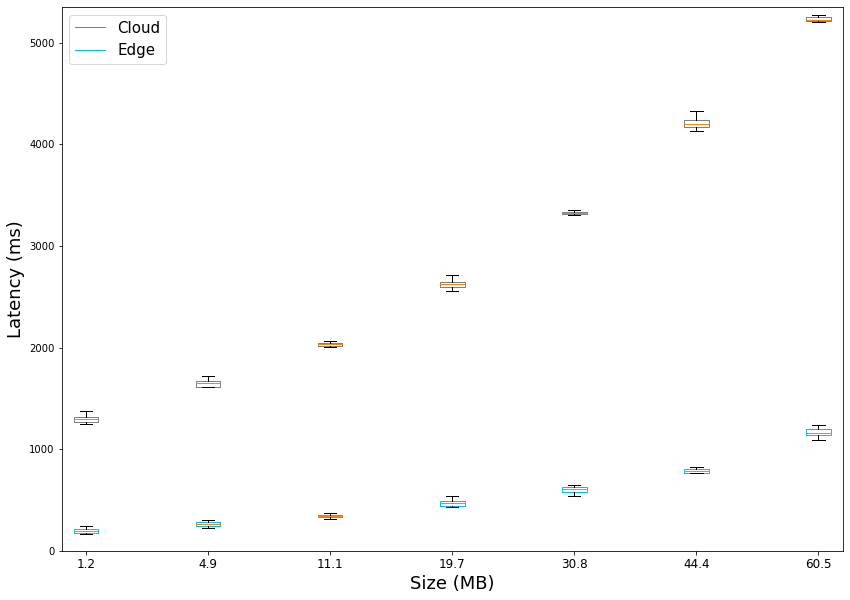

In [74]:
cloud_scenario = ['cloud_20','cloud_40','cloud_60','cloud_80','cloud_100','cloud_120','cloud_140']
edge_scenario = ['edge_20','edge_40','edge_60','edge_80','edge_100','edge_120','edge_140']

cloud_boxes = []
edge_boxes = []
x = []

fig = plt.figure(figsize=[14,10])
ax = plt.subplot(111)

for s in cloud_scenario:
    for d in dfs_dict[s][0]['Size (MB)']:
        x.append(round(d,1))
        break
    cloud_boxes.append(dfs_dict[s][0]['Latency (ms)'])
    
for s in edge_scenario: edge_boxes.append(dfs_dict[s][0]['Latency (ms)'])

b1 = ax.boxplot(cloud_boxes,0,'',positions=range(0,7), widths = 0.2)
b2 = ax.boxplot(edge_boxes,0,'',positions=range(0,7), widths = 0.2)

for b in b1['boxes']: b.set(color='gray')
for b in b2['boxes']: b.set(color='deepskyblue')
    
ax.set_xticks(range(0,7))
ax.set_xticklabels(x, fontsize='12')
ax.set_xlabel('Size (MB)')
ax.set_ylabel('Latency (ms)')
ax.set_xlim(-0.2, 6.2)
ax.set_ylim(0, 5350)
ax.legend([b1["boxes"][0], b2["boxes"][0]], ['Cloud', 'Edge'], fontsize='15')
ax.xaxis.get_label().set_size(18)
ax.yaxis.get_label().set_size(18)
plt.show()


In [75]:
fig.savefig(f'images/independent_run_fixed_size.pdf', dpi=100)

# Mobility

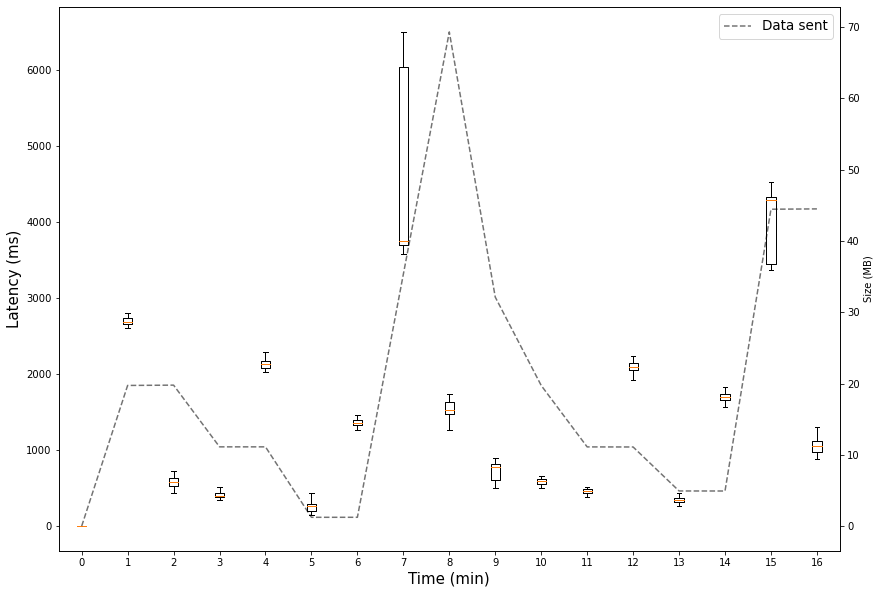

In [28]:
fig = plt.figure(figsize=[14,10])
ax = plt.subplot(111)
ax_background = ax.twinx()
ax.grid(False)
ax_background.grid(False)

x = dfs_dict['mobility'][0].reset_index()['Time']
y_size = dfs_dict['mobility'][0].reset_index()['Size (MB)']

ax_background.plot(
    x,
    y_size, 
    linestyle='dashed', 
    label='Data sent', 
    color='black', 
    zorder=100, 
    alpha=.55
)

all_data = []

for i in range(0,17):
    data = []
    for df in dfs_dict['mobility']:
        data.append(df['Latency (ms)'][i])
    all_data.append(data)
box = ax.boxplot(all_data, 0, '', positions=range(0,17), widths = 0.2)
ax.set_xticklabels([t for t in range(0,17)])
ax.set_xlabel('Time (min)')
ax.set_ylabel('Latency (ms)')
ax_background.set_ylabel('Size (MB)')
ax.xaxis.get_label().set_size(15)
ax.yaxis.get_label().set_size(15)

# legend settings
#ax.legend(loc='upper left', ncol=1, frameon=True, fontsize=13.5)
ax_background.legend( loc='upper right', ncol=1, frameon=True, fontsize=13.5)

plt.show()

In [21]:
fig.savefig(f'images/mobility_single_pipeline.pdf', dpi=100)

# Mobility Line

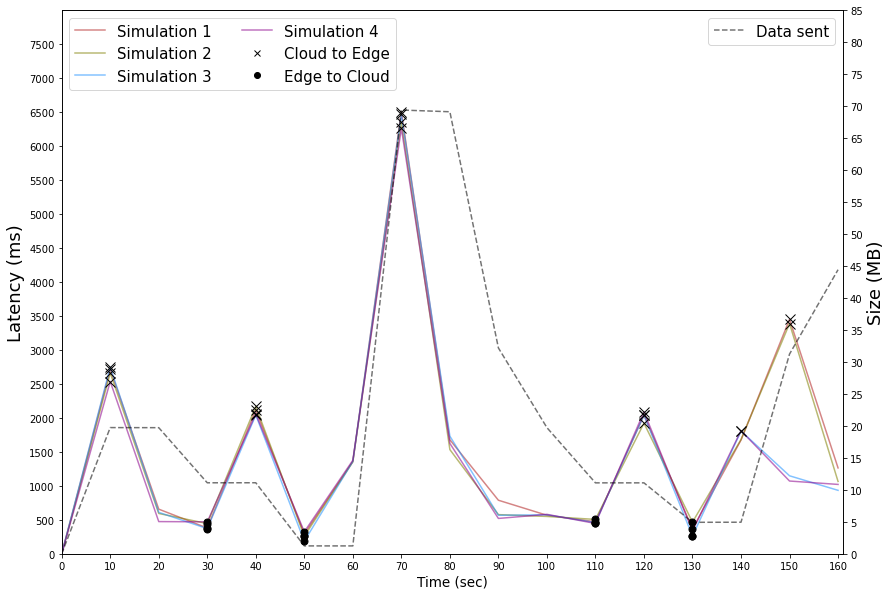

In [5]:
x = dfs_dict['mobility_line'][0].reset_index()['Time']
b = dfs_dict['mobility_line'][0].reset_index()['Size (MB)']
l1 = dfs_dict['mobility_line'][0].reset_index()['Latency (ms)']
l2 = dfs_dict['mobility_line'][1].reset_index()['Latency (ms)']
l3 = dfs_dict['mobility_line'][2].reset_index()['Latency (ms)']
l4 = dfs_dict['mobility_line'][3].reset_index()['Latency (ms)']

fig = plt.figure(figsize=[14,10])
ax = plt.subplot(111)
ax_background = ax.twinx()
ax.grid(False)
ax_background.grid(False)

# define background plot for bytes
byte = ax_background.plot(
    x,
    b, 
    linestyle='dashed', 
    label='Data sent', 
    color='black', 
    zorder=100, 
    alpha=.55
)



#####latency#####

lat = ax.plot(
    x,
    l1, 
    linestyle='solid', 
    color='firebrick', 
    label='Simulation 1',
    zorder=10000, 
    alpha=.55
)

lat3 = ax.plot(
    x,
    l3, 
    linestyle='solid', 
    color='olive', 
    label='Simulation 2',
    zorder=10000, 
    alpha=.55
)

lat2 = ax.plot(
    x,
    l2, 
    linestyle='solid', 
    color='dodgerblue', 
    label='Simulation 3',
    zorder=10000, 
    alpha=.55
)


lat4 = ax.plot(
    x,
    l4, 
    linestyle='solid', 
    color='darkmagenta', 
    label='Simulation 4',
    zorder=10000, 
    alpha=.55
)





###swap points#####
ms = 7
ax.plot(1, 2716.19735466, linewidth=100, marker="x", markersize=ms+3, markeredgecolor="black", markerfacecolor="black", zorder=10000)
ax.plot(1, 2746.6666666666665, linewidth=100, marker="x", markersize=ms+3, markeredgecolor="black", markerfacecolor="black", zorder=10000)
ax.plot(1, 2661.6666666666665, linewidth=100, marker="x", markersize=ms+3, markeredgecolor="black", markerfacecolor="black", zorder=10000)
ax.plot(1, 2535.5, linewidth=100, marker="x", markersize=ms+3, markeredgecolor="black", markerfacecolor="black", zorder=10000)

ax.plot(3, 379.3333333333333, linewidth=100, marker="o", markersize=ms, markeredgecolor="black", markerfacecolor="black", zorder=10000)
ax.plot(3, 371.3333333333333, linewidth=100, marker="o", markersize=ms, markeredgecolor="black", markerfacecolor="black", zorder=10000)
ax.plot(3, 444.6666666666667, linewidth=100, marker="o", markersize=ms, markeredgecolor="black", markerfacecolor="black", zorder=10000)
ax.plot(3, 470.3333333333333, linewidth=100, marker="o", markersize=ms, markeredgecolor="black", markerfacecolor="black", zorder=10000)

ax.plot(4, 2115, linewidth=100, marker="x", markersize=ms+3, markeredgecolor="black", markerfacecolor="black", zorder=10000)
ax.plot(4, 2042, linewidth=100, marker="x", markersize=ms+3, markeredgecolor="black", markerfacecolor="black", zorder=10000)
ax.plot(4, 2170, linewidth=100, marker="x", markersize=ms+3, markeredgecolor="black", markerfacecolor="black", zorder=10000)
ax.plot(4, 2056.5, linewidth=100, marker="x", markersize=ms+3, markeredgecolor="black", markerfacecolor="black", zorder=10000)

ax.plot(5, 262.5, linewidth=100, marker="o", markersize=ms, markeredgecolor="black", markerfacecolor="black", zorder=10000)
ax.plot(5, 186, linewidth=100, marker="o", markersize=ms, markeredgecolor="black", markerfacecolor="black", zorder=10000)
ax.plot(5, 259.5, linewidth=100, marker="o", markersize=ms, markeredgecolor="black", markerfacecolor="black", zorder=10000)
ax.plot(5, 324, linewidth=100, marker="o", markersize=ms, markeredgecolor="black", markerfacecolor="black", zorder=10000)

ax.plot(7, 6504, linewidth=100, marker="x", markersize=ms+3, markeredgecolor="black", markerfacecolor="black", zorder=10000)
ax.plot(7, 6466, linewidth=100, marker="x", markersize=ms+3, markeredgecolor="black", markerfacecolor="black", zorder=10000)
ax.plot(7, 6355.5, linewidth=100, marker="x", markersize=ms+3, markeredgecolor="black", markerfacecolor="black", zorder=10000)
ax.plot(7, 6263.5, linewidth=100, marker="x", markersize=ms+3, markeredgecolor="black", markerfacecolor="black", zorder=10000)

ax.plot(11, 471.3333333333333, linewidth=100, marker="o", markersize=ms, markeredgecolor="black", markerfacecolor="black", zorder=10000)
ax.plot(11, 459.25, linewidth=100, marker="o", markersize=ms, markeredgecolor="black", markerfacecolor="black", zorder=10000)
ax.plot(11, 506, linewidth=100, marker="o", markersize=ms, markeredgecolor="black", markerfacecolor="black", zorder=10000)
ax.plot(11, 446.5, linewidth=100, marker="o", markersize=ms, markeredgecolor="black", markerfacecolor="black", zorder=10000)

ax.plot(12, 2040.5, linewidth=100, marker="x", markersize=ms+3, markeredgecolor="black", markerfacecolor="black", zorder=10000)
ax.plot(12, 2041, linewidth=100, marker="x", markersize=ms+3, markeredgecolor="black", markerfacecolor="black", zorder=10000)
ax.plot(12, 1922, linewidth=100, marker="x", markersize=ms+3, markeredgecolor="black", markerfacecolor="black", zorder=10000)
ax.plot(12, 2089, linewidth=100, marker="x", markersize=ms+3, markeredgecolor="black", markerfacecolor="black", zorder=10000)

ax.plot(13, 364, linewidth=100, marker="o", markersize=ms, markeredgecolor="black", markerfacecolor="black", zorder=10000)
ax.plot(13, 261, linewidth=100, marker="o", markersize=ms, markeredgecolor="black", markerfacecolor="black", zorder=10000)
ax.plot(13, 261, linewidth=100, marker="o", markersize=ms, markeredgecolor="black", markerfacecolor="black", zorder=10000)
ax.plot(13, 466, linewidth=100, marker="o", markersize=ms, markeredgecolor="black", markerfacecolor="black", zorder=10000)

ax.plot(15, 3450, linewidth=100, marker="x", markersize=ms+3, markeredgecolor="black", markerfacecolor="black", zorder=10000)
ax.plot(15, 3387.6666666666665, linewidth=100, marker="x", markersize=ms+3, markeredgecolor="black", markerfacecolor="black", zorder=10000)

ax.plot(14, 1806.5, linewidth=100, marker="x", markersize=ms+3, markeredgecolor="black", markerfacecolor="black", zorder=10000)
ax.plot(14, 1812, linewidth=100, marker="x", markersize=ms+3, markeredgecolor="black", markerfacecolor="black", zorder=10000)




ax.plot([],[],'x',label="Cloud to Edge", color='black')
ax.plot([],[],'o',label="Edge to Cloud", color='black')


# set ticks and labels
ax.set_xlabel('Time (sec)', fontsize=13.5)
ax.set_xticks(range(0, 17))
ax.set_xticklabels([x for x in range(0, 170, 10)])

# background ticks and labels
ax.set_yticks(range(0, 8000, 500))
ax_background.set_yticks(range(0, 90, 5))
ax.set_xlim(0, 16.1)
ax.set_ylim(-.0001, 8000)
ax_background.set_ylim(-.0001, 85)
ax.set_ylabel('Latency (ms)', fontsize=18)
ax_background.set_ylabel('Size (MB)', fontsize=18)

# legend settings
ax.legend(loc='upper left', ncol=2, frameon=True, fontsize=15)
ax_background.legend(loc='upper right', ncol=1, frameon=True, fontsize=15)
plt.show()

In [6]:
fig.savefig(f'images/mobility_single_pipeline_2_run.pdf', dpi=100)